# 1. Import and Install Dependencies

In [3]:
%pip install tensorflow==2.9.1 tensorflow-gpu==2.9.0 opencv-python mediapipe sklearn matplotlib

Defaulting to user installation because normal site-packages is not writeable
  Using cached tensorflow-2.9.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (511.7 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.7/511.7 MB 719.3 kB/s eta 0:00:00m eta 0:00:010:00:06
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 2.5 MB/s eta 0:00:00m eta 0:00:010:01:01
  Using cached flatbuffers-1.12-py2.py3-none-any.whl (15 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 1.7 MB/s eta 0:00:000:00:010:00:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 2.5 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.0/33.0 MB 1.8 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.0/33.0 MB 2.2 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.5/31.5 MB 1.9 MB/s eta 0:00:00m eta 0:00:010:

In [4]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# 2. Keypoints using MP Holistic

In [5]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [6]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [7]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [8]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [9]:
cap  = cv2.VideoCapture(0)  
 
with mp_holistic.Holistic(min_detection_confidence = 0.5, min_tracking_confidence = 0.5) as holistic: #Able to access the holistic model by creating detention confidence and tracking it by 0.5
   
    while cap.isOpened():                      #Initiate loop in web cam
    
        #Read Feed
        ret, frame = cap.read()                #Read frame from prescribed time, If stacked together will look like a video capture. This will return Value and Frame
        
        #Make Detection
        image, results =mediapipe_detection(frame, holistic)
        print (results)

        #Draw Landmarks
        draw_styled_landmarks(image, results)

        #Show to Screen
        cv2.imshow('OpenCV Feed', image)       #Will show frame and have them placed in OpenCV Feed

        #Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'): #Wait for 'q' key to be pressed to break from the loop
            break
    cap.release()  #Realese the Web Cam
    cv2.destroyAllWindows()  #Destroy all Windows

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [10]:
draw_landmarks(frame, results)

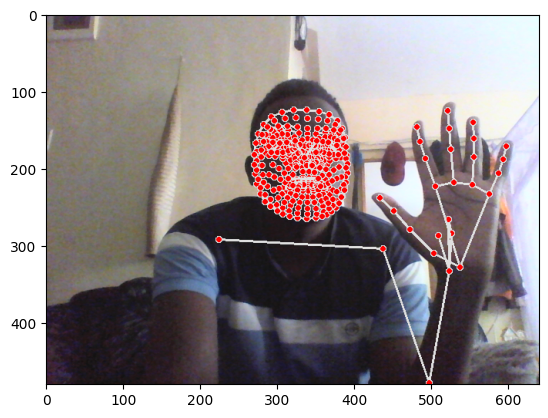

In [11]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

In [12]:
len(results.left_hand_landmarks.landmark)

21

In [14]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [15]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [16]:
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)


In [17]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [18]:
result_test = extract_keypoints(results)

In [19]:
result_test

array([ 0.52373016,  0.38842392, -0.56064498, ...,  0.        ,
        0.        ,  0.        ])

In [20]:
np.save('0', result_test)

In [21]:
np.load('0.npy')

array([ 0.52373016,  0.38842392, -0.56064498, ...,  0.        ,
        0.        ,  0.        ])

# 4. Setup Folders for Collection

In [22]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['hello', 'thanks', 'iloveyou'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

# Folder start
start_folder = 30

In [23]:
for action in actions:
    for sequence in range(no_sequences):
        try:
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence))) #Going to make folders where the data will be input inform of arrays of the actions in sequence @30 frame of videos
        except:
            pass

In [25]:
for action in actions: 
    dirmax = np.max(np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int))
    for sequence in range(1,no_sequences+1):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(dirmax+sequence)))
        except:
            pass

# 5. Collect Keypoint Values for Training and Testing

In [26]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions; hello, i love you and thanks
    for action in actions:

        # Loop through sequences aka videos; loop 30 times
        for sequence in range(start_folder, start_folder+no_sequences):

            # Loop through video length aka sequence length; loop each frame
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic; create collection breaks which will allow you to reset and reposition yourself to collect the action from start to finish
                if frame_num == 0:                                                                                   #if at frame 0
                    cv2.putText(image, 'STARTING COLLECTION', (120,200),                                             #Displays start collection text at the video
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), #Displays video number of collecting frames
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(500)                                                                                 #take a break 0.5 seconds
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)                                        #Extracts keypoints of the results
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))     #numpy path of all the arrays; data path, actions, the videos and the frames
                np.save(npy_path, keypoints)                                                  #save the numpy arrays and the keypoints

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [27]:
#End the video
cap.release()
cv2.destroyAllWindows()

# 6. Preprocess Data and Create Labels and Features

In [24]:
%pip install keras.utils 

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [25]:
#iMPORT MORE LIBRARIES FOR TRAIN_TEST_SPLIT AND TO_CATEGORICAL
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical

2023-03-13 09:30:54.218099: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/armsy326/.local/lib/python3.10/site-packages/cv2/../../lib64:
2023-03-13 09:30:54.218135: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [26]:
#Create label map
label_map = {label:num for num, label in enumerate(actions)}   

In [27]:
label_map

{'hello': 0, 'thanks': 1, 'iloveyou': 2}

In [28]:
#Create one big arry with all data; 90 arrays with 30 frames that have 1662 values as keypoints
sequences, labels = [], []         #Brings the data; sequence as featured data (x_data) and labels as (y_data) represents relationship of the data
for action in actions:
    for sequence in range(no_sequences):
    #for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []  #Blank array for sequence
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num))) #grab all sequences and add to the window from 0 to 29
            window.append(res)          #append to window and save as res
        sequences.append(window)        #sequence has 90 video frames append to the window
        labels.append(label_map[action]) #append the labels

In [29]:
sequences

[[array([ 0.64871532,  0.57448477, -1.5271107 , ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.64307594,  0.57140952, -1.27057958, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.64051467,  0.57003057, -1.3747046 , ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.63953871,  0.56995791, -1.40947819, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.63876587,  0.56571311, -1.42378759, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.63879406,  0.5576151 , -1.55487728, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.63954026,  0.54858905, -1.21138215, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.63956863,  0.52563143, -1.26687145, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.63931519,  0.50755638, -1.19481063, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.63839674,  0.49804708, -1.24288929, ...,  0.        ,
       

In [30]:
#Shape of the sequence array
np.array(sequences).shape       #Has 90 videos, 30 frames and 1662 sequences

(90, 30, 1662)

In [31]:
#Shape of the labels array
np.array(labels).shape          #Has 90 videos

(90,)

In [32]:
X = np.array(sequences)

In [33]:
X.shape

(90, 30, 1662)

In [34]:
#Convert the numbers of arrays to binary numbers
y = to_categorical(labels).astype(int)     #Convert initial labels from series of numbers to binary flag (1,0,0) rep hello, (0,1,0) rep i love you and (0,0,1) rep thanks

In [35]:
#Train, test and split the data (y and x)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)   #Unpacked the values of x_train, x_test, y_train, y_test then train_test_split them with test size of 0.05

In [36]:
X_train.shape

(72, 30, 1662)

In [37]:
X_test.shape

(18, 30, 1662)

In [38]:
y_test.shape

(18, 3)

In [39]:
y_train.shape  #72 labels

(72, 3)

# 7. Build and Train LSTM Neural Network

In [41]:
#Import libraries
from keras.models import Sequential                  #Import Sequential Neural Network model
from keras.layers import LSTM, Dense                 #Import Long Short Term Memory Layer and Dense Layer
from keras.callbacks import TensorBoard              #Import the TensorBoard for callbacks; trace the model performance

In [42]:
#Tensorboard callback for tracing Neural Network performance; monitor training and performance
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [43]:
#Neural Network Architecture
model = Sequential()                                                                     #Instancing the Sequential model which is easy to use
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))     #Add 3 LSTM layer, return the sequence and use "relu" as the activation function
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))                           #Return false due to next layer being Dense layer
model.add(Dense(64, activation='relu'))                                                  #Add 2 Dense layer and "relu" as the activation function
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))                                 #Add Dense layer via actions shape and use "softmax" as the activation function

2023-03-13 09:52:03.622175: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/armsy326/.local/lib/python3.10/site-packages/cv2/../../lib64:
2023-03-13 09:52:03.622231: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2023-03-13 09:52:03.622263: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (pop-os): /proc/driver/nvidia/version does not exist
2023-03-13 09:52:03.739327: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [44]:
#Compile the model
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])   #Use "Adam" as the optimizer, apply "categorical_crossentropy" loss to the model and "categorical_accuracy" metrics

In [46]:
#Fit the model
model.fit(X_train, y_train, epochs=1000, callbacks=[tb_callback])       #Train X-axis and y-axis, "epochs" number of times of training and allow callback

Epoch 1/1000
3/3 [==============================] - 1s 169ms/step - loss: 1.0827 - categorical_accuracy: 0.3611
Epoch 2/1000
3/3 [==============================] - 0s 146ms/step - loss: 1.0826 - categorical_accuracy: 0.3611
Epoch 3/1000
3/3 [==============================] - 0s 147ms/step - loss: 1.0826 - categorical_accuracy: 0.3611
Epoch 4/1000
3/3 [==============================] - 0s 139ms/step - loss: 1.0826 - categorical_accuracy: 0.3611
Epoch 5/1000
3/3 [==============================] - 1s 183ms/step - loss: 1.0825 - categorical_accuracy: 0.3611
Epoch 6/1000
3/3 [==============================] - 1s 172ms/step - loss: 1.0824 - categorical_accuracy: 0.3611
Epoch 7/1000
3/3 [==============================] - 1s 192ms/step - loss: 1.0823 - categorical_accuracy: 0.3611
Epoch 8/1000
3/3 [==============================] - 1s 149ms/step - loss: 1.0822 - categorical_accuracy: 0.3611
Epoch 9/1000
3/3 [==============================] - 0s 141ms/step - loss: 1.0821 - categorical_accuracy:

In [48]:
#Summary of the Model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 64)            442112    
                                                                 
 lstm_1 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 3)                 99        
                                                                 
Total params: 596,675
Trainable params: 596,675
Non-trai

# 8. Make Predictions

In [49]:
#Predicting results
res = model.predict(X_test)

1/1 [==============================] - 1s 624ms/step


In [52]:
#Predict the actions in results
actions[np.argmax(res[2])]

'thanks'

In [54]:
#Predict the actions in y-test
actions[np.argmax(y_test[2])]

'thanks'

# 9. Save Weights

In [55]:
#Save the model as action.h5
model.save('action.h5')

In [ ]:
#Delete the model
del model

In [ ]:
#Reload the model saved
model.load_weights('action.h5')

# 10. Evaluation using Confusion Matrix and Accuracy

In [76]:
#Import Scikit learn that will be used for evaluation of the model; accuracy_score and multilabel_confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [65]:
#yhat = model.predict(X_test)

1/1 [==============================] - 0s 51ms/step


In [77]:
yhat = model.predict(X_train)

3/3 [==============================] - 0s 30ms/step


In [75]:
#ytrue = np.argmax(y_test, axis=1).tolist()    #Convert yhat values to binary and ytrue to a lit
#yhat = np.argmax(yhat, axis=1).tolist()

In [78]:
ytrue = np.argmax(y_train, axis=1).tolist()    #Convert yhat values to binary and ytrue to a lit
yhat = np.argmax(yhat, axis=1).tolist()

In [79]:
multilabel_confusion_matrix(ytrue, yhat)      #Use 2by2 confusion matrix

array([[[48,  0],
        [ 0, 24]],

       [[47,  0],
        [ 0, 25]],

       [[49,  0],
        [ 0, 23]]])

In [80]:
#Accuracy of the model
accuracy_score(ytrue, yhat)

1.0

# 11. Test in Real Time

In [81]:
from scipy import stats

In [82]:
#Probability of viz_logic
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):       #Def prob_viz function passing 3 arguements                                    
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)                               #Pass the rectangle size
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)   #Pass the texts to be displayed
        
    return output_frame     #Display output frame

In [83]:
plt.figure(figsize=(18,18))                        #Display figure size
plt.imshow(prob_viz(res, actions, image, colors))  #Display outputs

TypeError: only size-1 arrays can be converted to Python scalars

<Figure size 1800x1800 with 0 Axes>

In [84]:
# 1. New detection variables
sequence = []                            #Collect 30 frames
sentence = []                            #Concantinet all the prediction done above
predictions = []                         #Append new array of Predictions
threshold = 0.5                          #Confidence metrics

cap = cv2.VideoCapture(0)                #Open web camera   

# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()                                    #Read the frames via web cam

        # Make detections
        image, results = mediapipe_detection(frame, holistic)      #Pass image and results via media pipe
        print(results)                                             #Print the results
        
        # Draw landmarks
        draw_styled_landmarks(image, results)        #Draw styled landmarks
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)       #Extract keypoints
        sequence.append(keypoints)                  #Append the sequence with keypoints
        #sequence.insert(0, keypoints) 
        sequence = sequence[-30:]                    #Grab the last 30 frames
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]   #Output result
            print(actions[np.argmax(res)])                             #Print actions
            predictions.append(np.argmax(res))                         #Prediction
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold:                    #Check the threshold of the results
                    
                    if len(sentence) > 0:                              #Check length of the sentence to be greater than 0
                        if actions[np.argmax(res)] != sentence[-1]:    #Check the last action if not equal to last sentence
                            sentence.append(actions[np.argmax(res)])   #Append detected action if available
                    else:
                        sentence.append(actions[np.argmax(res)])       #Else append the action and displayed the action

            if len(sentence) > 5:                                      #Check length sentence if it 5
                sentence = sentence[-5:]                               #Sentence will grab last 5 sentences of arrays being rendered

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)             #Pass the image in viz probabilities
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)                       #Pass the rectangle with different parameters
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)     #Pass Text to be displayed
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti